# Predicting Life Expectancy Across Countries: README

## Project Overview

This project focuses on **analyzing and predicting life expectancy** based on critical health, economic, and social factors for 193 countries. By leveraging machine learning and statistical methods, the aim is to identify key contributors to life expectancy and provide insights that could guide public health policies and interventions globally.

---

## Dataset Description

The dataset is derived from the *Global Health Observatory (GHO)* under the **World Health Organization (WHO)**, with additional economic data collected from the **United Nations**. It includes information from **2000 to 2015**, reflecting the developments in health and economic sectors that have significantly improved human mortality rates, particularly in developing nations.

### Key Details:
- **Source**: WHO and UN databases.
- **Timeframe**: 2000–2015.
- **Coverage**: 193 countries.
- **Structure**: 
  - **Rows**: 2,938.
  - **Columns**: 22 (20 predictive features + target variable).
  - Categories: **Immunization, Mortality, Economic, and Social factors**.

# EDA

Our goal in this challenge is to **find the factors that affect the life expectancy**. So, the target variable is **Life_Expectancy**. 

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('../data/Life Expectancy Data.csv', delimiter=',')
df.dataframeName = 'Life Expectancy Data.csv'

In [8]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [11]:
df.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


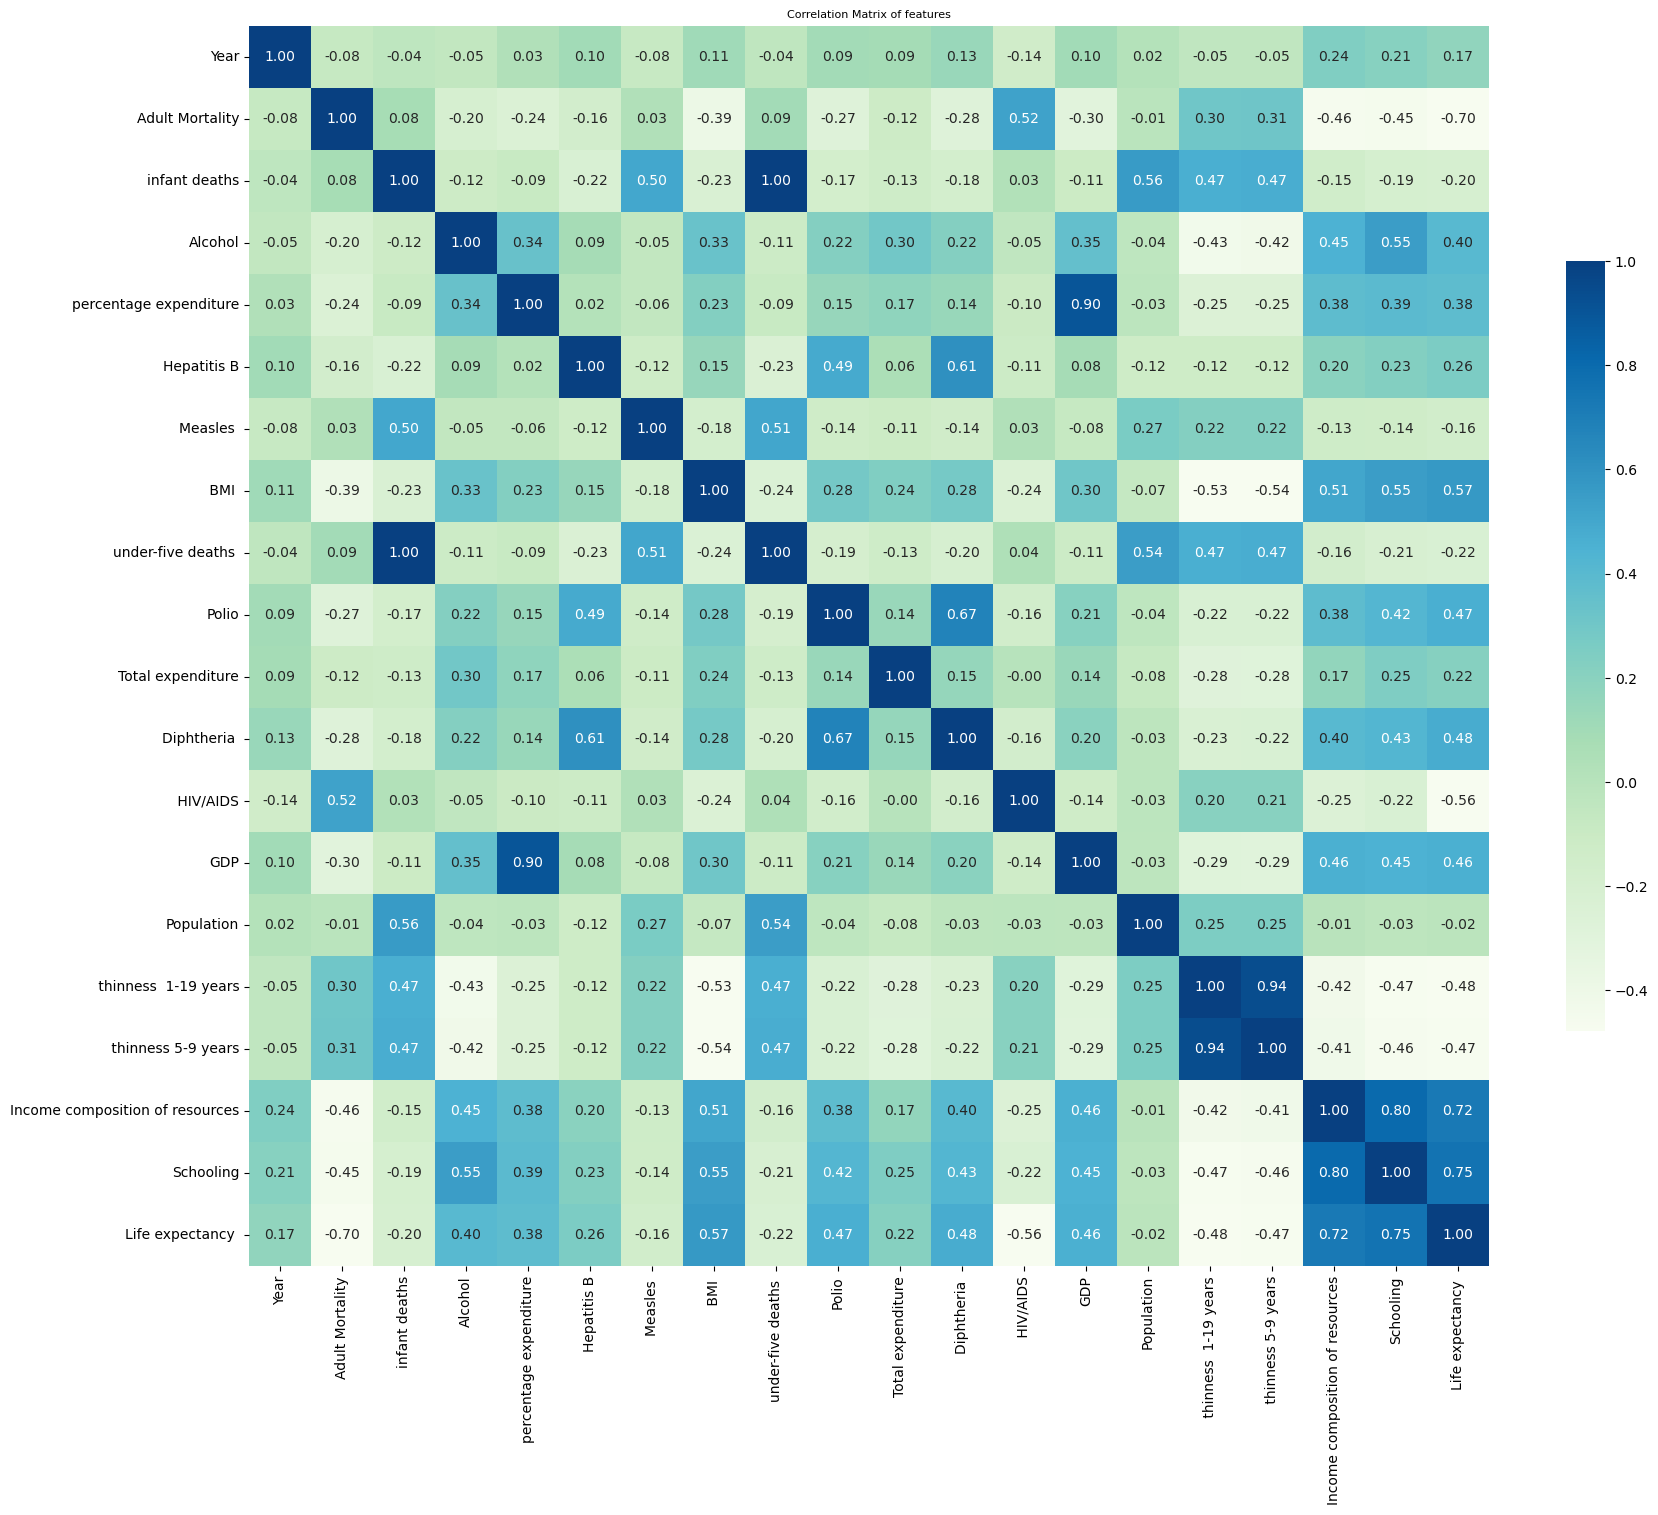

In [12]:
import seaborn as sns
col_for_corr = ['Year','Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy ']

plt.rcParams["figure.figsize"] = (20,20)
correlation_matrix = df[col_for_corr].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

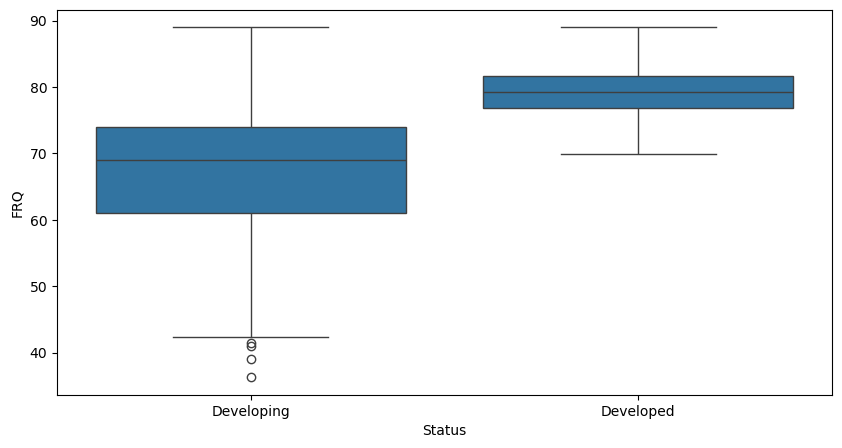

In [13]:
# see the impact of "status" on "Life Expectancy"
def box_plot(x_axis = None, y_axis = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.boxplot(x = x_axis, y = y_axis, data = df)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()


# set figure size
plt.figure(figsize=(10,5))

# call function i create it
box_plot(x_axis = "Status", y_axis = "Life expectancy ")

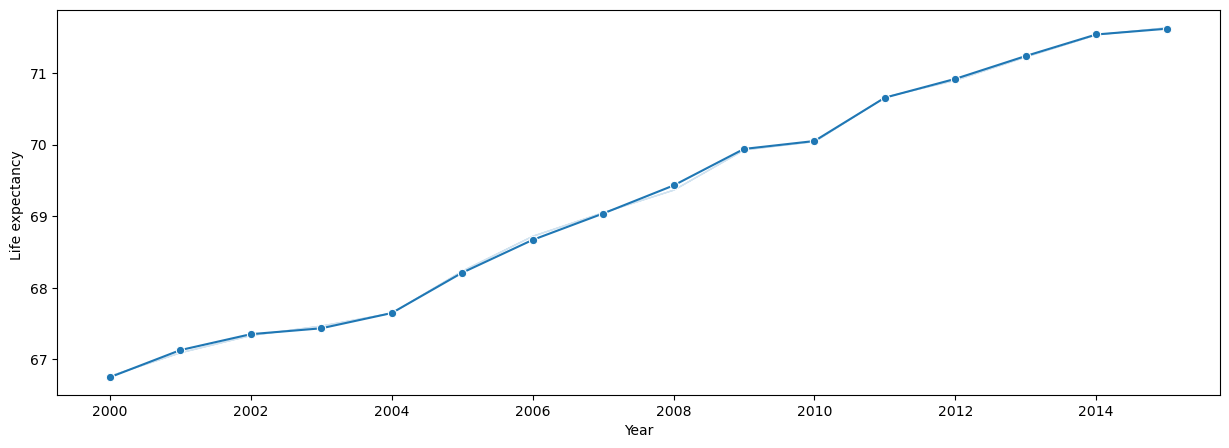

In [14]:
# see the impact of "year" on "Life Expectancy"

# set figure size
plt.figure(figsize=(15,5))

sns.lineplot(x = 'Year', y = 'Life expectancy ', data = df, marker = 'o' ,errorbar=('ci', False))
plt.show()

# Data Preprocessing

## Missing value 


In [16]:
missing = list()
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(f"{x}: {df[x].isnull().sum()} ({df[x].isnull().sum()/df.shape[0]*100}%)"  )
        missing.append(x),

Life expectancy : 10 (0.3403675970047651%)
Adult Mortality: 10 (0.3403675970047651%)
Alcohol: 194 (6.603131381892443%)
Hepatitis B: 553 (18.82232811436351%)
 BMI : 34 (1.1572498298162015%)
Polio: 19 (0.6466984343090538%)
Total expenditure: 226 (7.6923076923076925%)
Diphtheria : 19 (0.6466984343090538%)
GDP: 448 (15.248468345813478%)
Population: 652 (22.19196732471069%)
 thinness  1-19 years: 34 (1.1572498298162015%)
 thinness 5-9 years: 34 (1.1572498298162015%)
Income composition of resources: 167 (5.684138869979578%)
Schooling: 163 (5.547991831177672%)


In [17]:
# Видаляємо рядки, де в колонці 'Life expectancy ' є null
df = df[df['Life expectancy '].notnull()]

df = df[df['Adult Mortality'].notnull()]

df = df[df['Polio'].notnull()]

df = df[df['Diphtheria '].notnull()]

df = df[df[' thinness  1-19 years'].notnull()]

df = df[df[' thinness 5-9 years'].notnull()]

missing = list()
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(f"{x}: {df[x].isnull().sum()} ({df[x].isnull().sum()/df.shape[0]*100}%)"  )
        missing.append(x),

Alcohol: 175 (6.059556786703601%)
Hepatitis B: 525 (18.178670360110804%)
Total expenditure: 212 (7.340720221606649%)
GDP: 435 (15.062326869806094%)
Population: 644 (22.299168975069254%)
Income composition of resources: 160 (5.540166204986149%)
Schooling: 160 (5.540166204986149%)


Our next in target is "ALCOHOL" feature which has almost about 194 Nans. Let's fill it using other column which represents best this column.
To do this let us first see the correlation matrix of these features. Best correlation near 0.6 is with Schooling column. 

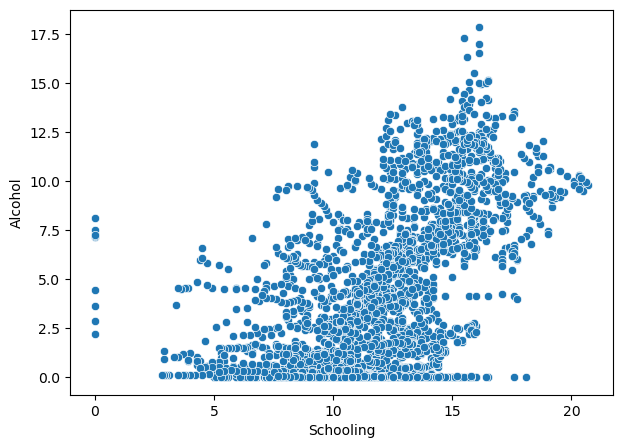

In [19]:
# Set the figure size (width, height)
plt.figure(figsize=(7, 5))  # Adjust these numbers to control the size

sns.scatterplot(x=df['Schooling'],y=df['Alcohol']);

plt.show()

Let's select values by observing a trends in selected intervals: 

In [21]:
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
df['Alcohol']=df[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

missing = list()
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(f"{x}: {df[x].isnull().sum()} ({df[x].isnull().sum()/df.shape[0]*100}%)"  )
        missing.append(x),

Alcohol: 9 (0.31163434903047094%)
Hepatitis B: 525 (18.178670360110804%)
Total expenditure: 212 (7.340720221606649%)
GDP: 435 (15.062326869806094%)
Population: 644 (22.299168975069254%)
Income composition of resources: 160 (5.540166204986149%)
Schooling: 160 (5.540166204986149%)


Here we can see, that 9 values are still Null. It's because there was no value in Schooling. Let's fill them with mean.

In [23]:
df['Alcohol']=df['Alcohol'].fillna(value=df['Alcohol'].mean())

missing = list()
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(f"{x}: {df[x].isnull().sum()} ({df[x].isnull().sum()/df.shape[0]*100}%)"  )
        missing.append(x),

Hepatitis B: 525 (18.178670360110804%)
Total expenditure: 212 (7.340720221606649%)
GDP: 435 (15.062326869806094%)
Population: 644 (22.299168975069254%)
Income composition of resources: 160 (5.540166204986149%)
Schooling: 160 (5.540166204986149%)


Hepatit B is highly corelated with diphteria. Let's use it: 

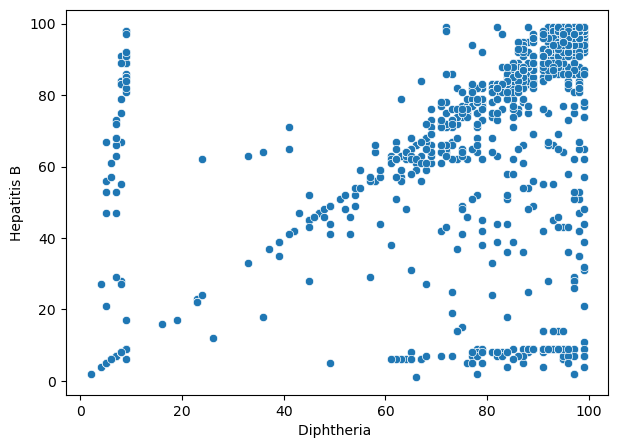

In [25]:
# Set the figure size (width, height)
plt.figure(figsize=(7, 5))  # Adjust these numbers to control the size

sns.scatterplot(x=df['Diphtheria '],y=df['Hepatitis B']);

plt.show()

In [26]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
df['Hepatitis B']=df[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

missing = list()
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(f"{x}: {df[x].isnull().sum()} ({df[x].isnull().sum()/df.shape[0]*100}%)"  )
        missing.append(x),

Total expenditure: 212 (7.340720221606649%)
GDP: 435 (15.062326869806094%)
Population: 644 (22.299168975069254%)
Income composition of resources: 160 (5.540166204986149%)
Schooling: 160 (5.540166204986149%)


'Total expenditure' with 'Alcohol' feature. 'GDP' feature with 'percentage expenditure ' feature.  'Population' feature with 'Infant death' feature. 'Schooling' feature and 'Income Composition of resources' feature with 'Life expactancy' feature.

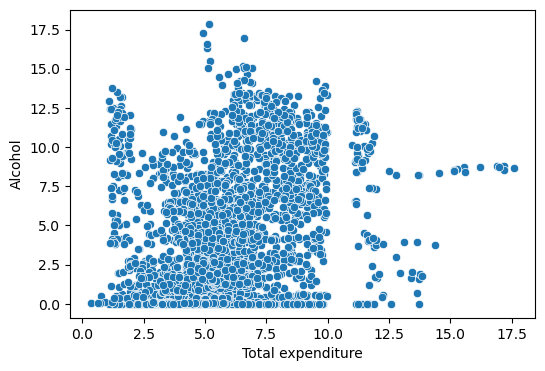

In [28]:
# Set the figure size (width, height)
plt.figure(figsize=(6, 4))  # Adjust these numbers to control the size

sns.scatterplot(x=df['Total expenditure'],y=df['Alcohol']);

plt.show()

In [29]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
df['Total expenditure']=df[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)

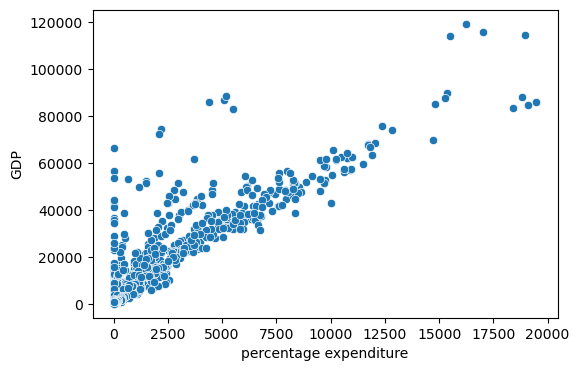

In [30]:
# Set the figure size (width, height)
plt.figure(figsize=(6, 4))  # Adjust these numbers to control the size

sns.scatterplot(x=df['percentage expenditure'],y=df['GDP']);

plt.show()

In [31]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g
    
df['GDP']=df[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

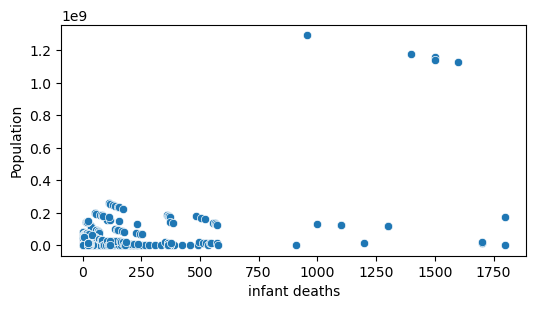

In [32]:
# Set the figure size (width, height)
plt.figure(figsize=(6, 3))  # Adjust these numbers to control the size

sns.scatterplot(x=df['infant deaths'],y=df['Population']);

plt.show()

In [33]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
df['Population']=df[['Population','infant deaths']].apply(impute_population,axis=1)

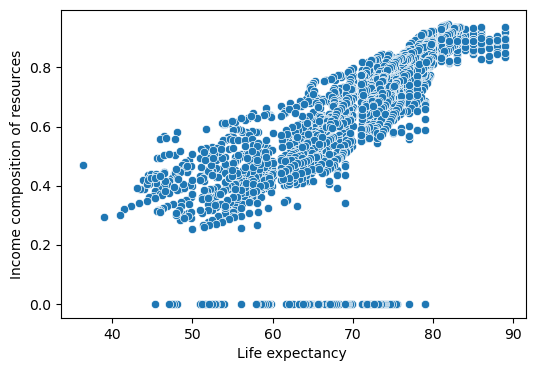

In [34]:
# Set the figure size (width, height)
plt.figure(figsize=(6, 4))  # Adjust these numbers to control the size

sns.scatterplot(x=df['Life expectancy '],y=df['Income composition of resources']);

plt.show()

In [35]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
df['Income composition of resources']=df[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)      

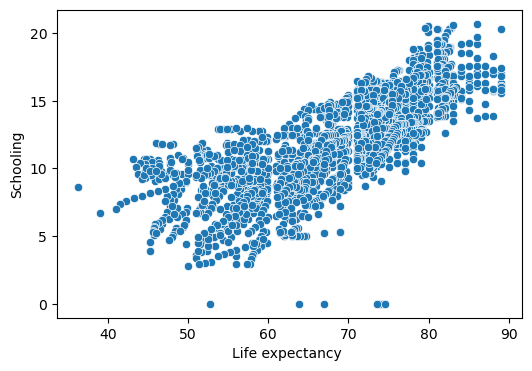

In [36]:
# Set the figure size (width, height)
plt.figure(figsize=(6, 4))  # Adjust these numbers to control the size

sns.scatterplot(x=df['Life expectancy '],y=df['Schooling']);

plt.show()

In [37]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
df['Schooling']=df[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

In [38]:
missing = list()
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(f"{x}: {df[x].isnull().sum()} ({df[x].isnull().sum()/df.shape[0]*100}%)"  )
        missing.append(x),

As we can see, there is no missing values.

## Categories encoding

In [41]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [42]:
encoder = LabelEncoder()

for column in ["Country", "Status"]:
    df[column] = encoder.fit_transform(df[column])


## Split data

In [44]:
from sklearn.preprocessing import StandardScaler

y=df['Life expectancy ']
X=df.drop('Life expectancy ',axis=1)

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))



In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2888 non-null   float64
 1   1       2888 non-null   float64
 2   2       2888 non-null   float64
 3   3       2888 non-null   float64
 4   4       2888 non-null   float64
 5   5       2888 non-null   float64
 6   6       2888 non-null   float64
 7   7       2888 non-null   float64
 8   8       2888 non-null   float64
 9   9       2888 non-null   float64
 10  10      2888 non-null   float64
 11  11      2888 non-null   float64
 12  12      2888 non-null   float64
 13  13      2888 non-null   float64
 14  14      2888 non-null   float64
 15  15      2888 non-null   float64
 16  16      2888 non-null   float64
 17  17      2888 non-null   float64
 18  18      2888 non-null   float64
 19  19      2888 non-null   float64
 20  20      2888 non-null   float64
dtypes: float64(21)
memory usage: 473.9 KB

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)



# Model training and evaluation

### Linear regression

In [49]:
from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()
Linear_model.fit(X_train,y_train)

predictions1=Linear_model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predictions1)**(0.5))

3.8247841412096673


In [51]:
from sklearn.metrics import r2_score

r2_score(y_test,predictions1)

0.8413291052898669

### SVM

In [53]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model with a different kernel (e.g., 'linear', 'poly', 'sigmoid')
svr_model = SVR(C=100.0, epsilon=1, kernel='linear')  # Changed kernel to 'linear'

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Predict on the test set
predictions1 = svr_model.predict(X_test)

# Calculate the RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, predictions1) ** 0.5
print("RMSE:", rmse)

# Calculate the R² score
r2 = r2_score(y_test, predictions1)
print("R² score:", r2)


RMSE: 3.8163392838231993
R² score: 0.8420290003773757


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the SVR model
svr = SVR()

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 100, 'epsilon': 0.1}


### RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
svr_model = RandomForestRegressor(n_estimators = 100, max_depth=7, min_samples_split=5)
svr_model.fit(X_train, y_train) 
predictions1=svr_model.predict(X_test)

In [58]:
print(mean_squared_error(y_test,predictions1)**(0.5))
r2_score(y_test,predictions1)

2.117096437834234


0.9513856264734358

## Hyperparameters scaling

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [5, 15, None],         # Tree depth
    'min_samples_split': [2, 5, 10]         # Minimum samples for a split
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
predictions1 = best_rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, predictions1) ** 0.5
r2 = r2_score(y_test, predictions1)

print("RMSE:", rmse)
print("R² score:", r2)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 1.7818189827001836
R² score: 0.9655641685452204


In [61]:
svr_model = RandomForestRegressor(n_estimators = 200, max_depth=None, min_samples_split=2)
svr_model.fit(X_train, y_train) 
predictions1=svr_model.predict(X_test)

In [62]:
print(mean_squared_error(y_test,predictions1)**(0.5))
r2_score(y_test,predictions1)

1.7712858703539553


0.9659700957431842

## Feature importance

Важливість ознак:
Ознака 0 (0): 0.5139267383977028
Ознака 1 (1): 0.30677801933260573
Ознака 2 (2): 0.09159023417888741
Ознака 3 (3): 0.01331872776237081
Ознака 4 (4): 0.011460355777269067
Ознака 5 (5): 0.006973883092922669
Ознака 6 (6): 0.006076695516940667
Ознака 7 (7): 0.005967140545392091
Ознака 8 (8): 0.005883521344034146
Ознака 9 (9): 0.005215286782421267
Ознака 10 (10): 0.004951803850491621
Ознака 11 (11): 0.004340569979725429
Ознака 12 (12): 0.004066065519986342
Ознака 13 (13): 0.0037365458756628
Ознака 14 (14): 0.003150069784981826
Ознака 15 (15): 0.0027160661702011145
Ознака 16 (16): 0.0026982298578906876
Ознака 17 (17): 0.0026285923952730837
Ознака 18 (18): 0.0021764436531231286
Ознака 19 (19): 0.002151003232956228
Ознака 20 (20): 0.00019400694916107782


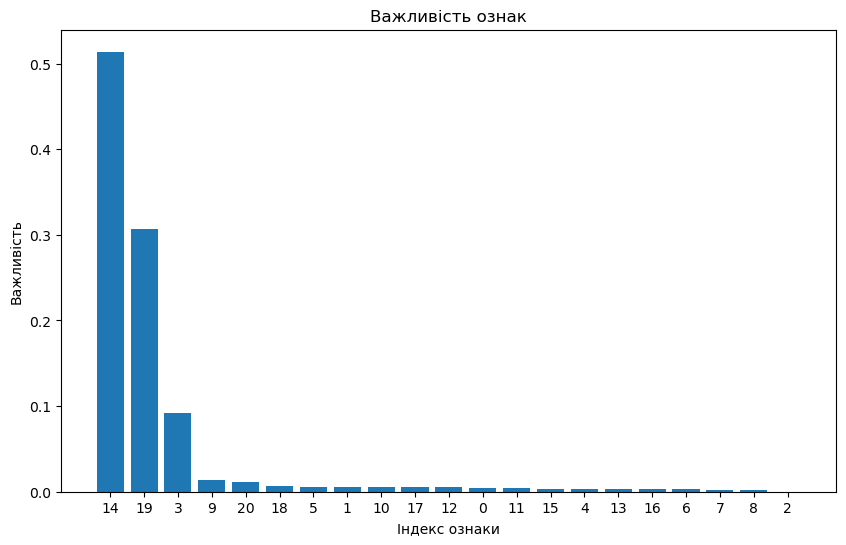

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Визначення важливості ознак
importances = svr_model.feature_importances_

# Індекси ознак, відсортовані за важливістю
indices = np.argsort(importances)[::-1]

# Виведення важливості ознак
print("Важливість ознак:")
for i in range(X_train.shape[1]):
    print(f"Ознака {i} ({X_train.columns[i]}): {importances[indices[i]]}")

# Візуалізація важливості ознак
plt.figure(figsize=(10, 6))
plt.title("Важливість ознак")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Індекс ознаки")
plt.ylabel("Важливість")
plt.show()


